# Multiple Linear Regression

Ta có công thức $f_{w_1, w_2, ..., w_n, b} = w_1. x_1 + w_2. x_2 + ... + w_n. x_n + b$

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

### Tạo dữ liệu dummy

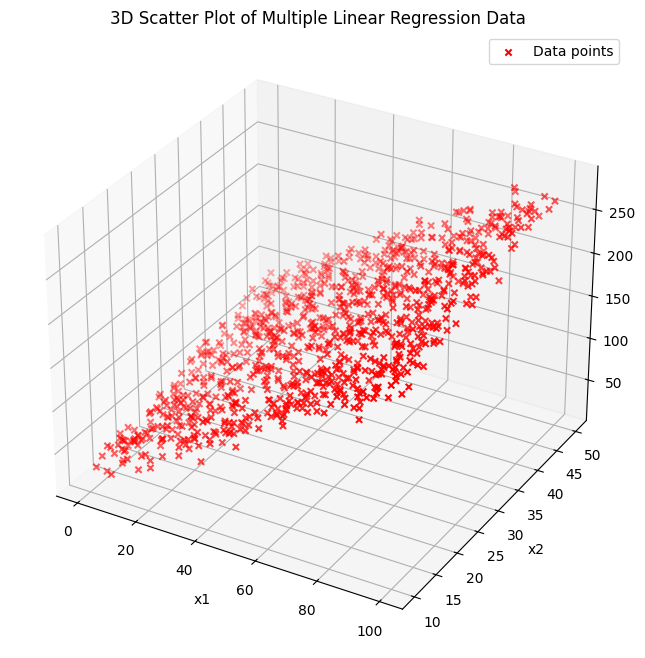

In [11]:
np.random.seed(42)

# Tạo 1000 điểm dữ liệu
n_samples = 1000

# Tạo hai biến độc lập x1, x2
x1 = np.linspace(0, 100, n_samples)  # Biến x1: giá trị từ 0 đến 100
x2 = np.random.uniform(10, 50, n_samples)  # Biến x2: giá trị ngẫu nhiên từ 10 đến 50

# Tạo biến phụ thuộc y với mối quan hệ tuyến tính: y = 2*x1 + 1.5*x2 + 5 + nhiễu
w1 = 2.0    # Hệ số cho x1
w2 = 1.5    # Hệ số cho x2
b = 5.0     # Hằng số
noise = np.random.normal(0, 10, n_samples)  # Nhiễu ngẫu nhiên với độ lệch chuẩn 10
y = w1 * x1 + w2 * x2 + b + noise

# visualize 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Vẽ scatter plot
scatter = ax.scatter(x1, x2, y, c='red', marker='x', label='Data points')

# Đặt nhãn cho các trục
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

# Đặt tiêu đề
plt.title('3D Scatter Plot of Multiple Linear Regression Data')

# Thêm legend
ax.legend()

# Hiển thị biểu đồ
plt.show()

In [12]:
# Chia dữ liệu
x_train, x_test, y_train, y_test = train_test_split(np.column_stack((x1, x2)), y, test_size=0.2)

### Tạo mô hình


In [13]:
from mpl_toolkits.mplot3d import Axes3D

def predict(x, weight, bias):
    """Tính giá trị dự đoán y = w1*x1 + w2*x2 + b"""
    return np.dot(x, weight) + bias

def compute_gradients(x, y, weight, bias):
    """Tính gradient cho weight và bias"""
    predictions = predict(x, weight, bias)
    errors = predictions - y
    dw = np.dot(errors, x) / len(y)  # Gradient cho weight (vector [dw1, dw2])
    db = np.mean(errors)             # Gradient cho bias
    return dw, db

def train_linear_regression(x, y, learning_rate=0.001, epochs=30, plot_interval=3):
    """
    Huấn luyện mô hình hồi quy tuyến tính sử dụng gradient descent
    Args:
        x: numpy array, biến độc lập (shape: [n_samples, 2])
        y: numpy array, biến phụ thuộc (shape: [n_samples])
        learning_rate: tốc độ học
        epochs: số vòng lặp huấn luyện
        plot_interval: tần suất vẽ đồ thị
    Returns:
        weight, bias: tham số mô hình đã huấn luyện
    """
    # Khởi tạo tham số
    weight = np.array([0.0, 0.0])
    bias = 0.0

    # Kiểm tra đầu vào
    if x.shape[0] != len(y):
        raise ValueError("Kích thước của x và y phải bằng nhau")
    if x.shape[0] == 0:
        raise ValueError("Dữ liệu đầu vào rỗng")
    if x.shape[1] != 2:
        raise ValueError("Dữ liệu x phải có đúng 2 biến độc lập")

    # Huấn luyện mô hình
    for epoch in range(epochs):
        # Tính gradient
        dw, db = compute_gradients(x, y, weight, bias)

        # Cập nhật tham số
        weight -= learning_rate * dw
        bias -= learning_rate * db
    return weight, bias

### Huấn luyện và kiểm thử

Weight cuối cùng: [2.03779048 1.61448063]
Bias cuối cùng: 0.1127908938878274


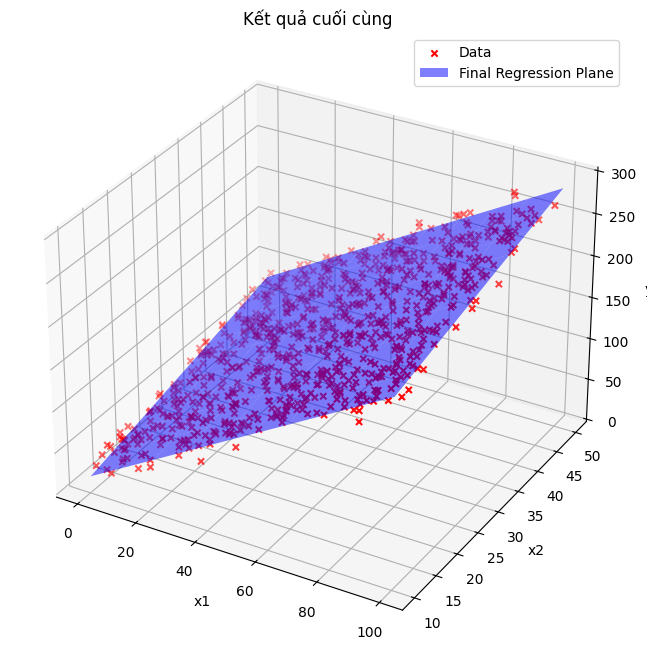

In [14]:
try:
    final_weight, final_bias = train_linear_regression(x_train, y_train, learning_rate=0.0001, epochs=1000, plot_interval=3)
    print(f"Weight cuối cùng: {final_weight}")
    print(f"Bias cuối cùng: {final_bias}")

    # Vẽ đồ thị cuối cùng
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x_train[:, 0], x_train[:, 1], y_train, c='red', marker='x', label='Data')

    # Tạo lưới cho mặt phẳng hồi quy cuối cùng
    x1_range = np.linspace(min(x_train[:, 0]), max(x_train[:, 0]), 10)
    x2_range = np.linspace(min(x_train[:, 1]), max(x_train[:, 1]), 10)
    x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
    y_grid = final_weight[0] * x1_grid + final_weight[1] * x2_grid + final_bias

    # Vẽ mặt phẳng
    ax.plot_surface(x1_grid, x2_grid, y_grid, color='blue', alpha=0.5, label='Final Regression Plane')

    # Đặt nhãn và tiêu đề
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')
    ax.set_title('Kết quả cuối cùng')
    ax.legend()

    plt.show()
except Exception as e:
    print(f"Lỗi trong quá trình huấn luyện: {str(e)}")

In [15]:
y_pred = predict(x_test, final_weight, final_bias)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 104.8178608840679
